Dimensionality Reduction Comparison
---
#### Method Testing
##### May 2019


Using discrete (`inputs/GSM1626793_P14Retina_1.digital_expression.csv.gz`, Mocosko, _et al_ 2015) and continuous (`inputs/qi_s1_edited_all.csv.gz`) datasets, downsample and feature select, then perform various DR techniques and compare the following:
* __Euclidean cell-cell distance__ correlations before and after transformation/reduction
* __Kullback-Leibler Divergence (KLD)__ explaining the Shannon entropy of the difference between the cumulative probability distributions of unique, normalized cell-cell distances.
* __K-nearest neighbor (Knn)__ preservation

In [3]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


---
#### 0. read in discrete dataset

In [50]:
P14Retina_0 = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.tsv', cells_axis=0, labels=[0,0])

In [52]:
# print cells x genes
P14Retina_0.data.shape

(1603, 500)

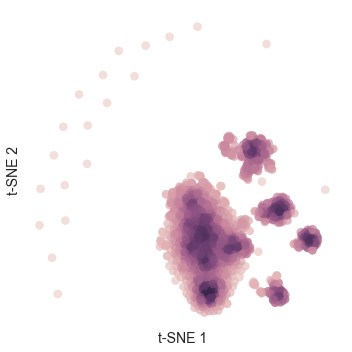

CPU times: user 10.4 s, sys: 63.4 ms, total: 10.5 s
Wall time: 10.4 s


In [53]:
%%time 
P14Retina_tSNE_05 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=5, seed=18) 
P14Retina_tSNE_05.plot()

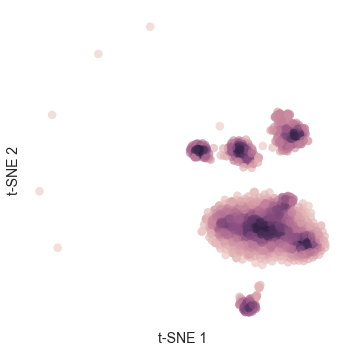

CPU times: user 12.3 s, sys: 98.6 ms, total: 12.4 s
Wall time: 12.5 s


In [54]:
%%time 
P14Retina_tSNE_10 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=10, seed=18) 
P14Retina_tSNE_10.plot()

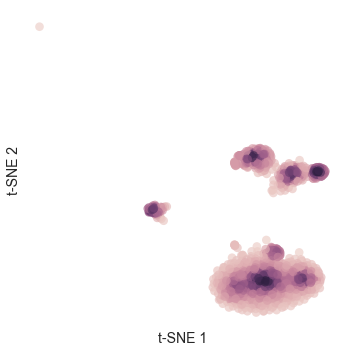

CPU times: user 15.1 s, sys: 270 ms, total: 15.4 s
Wall time: 15.5 s


In [55]:
%%time 
P14Retina_tSNE_30 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=30, seed=18) # use standard perplexity of 30 here
P14Retina_tSNE_30.plot()

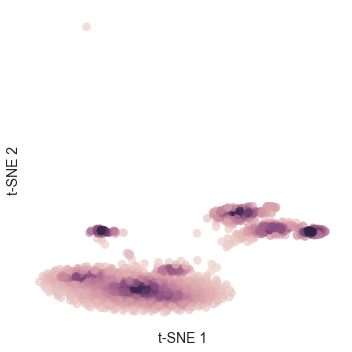

CPU times: user 19.5 s, sys: 559 ms, total: 20 s
Wall time: 20.1 s


In [56]:
%%time 
P14Retina_tSNE_70 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=70, seed=18) 
P14Retina_tSNE_70.plot()

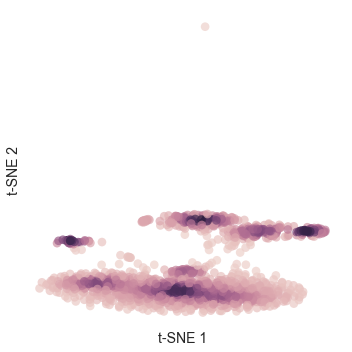

CPU times: user 21.3 s, sys: 797 ms, total: 22.1 s
Wall time: 22.1 s


In [57]:
%%time 
P14Retina_tSNE_100 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=100, seed=18) 
P14Retina_tSNE_100.plot()

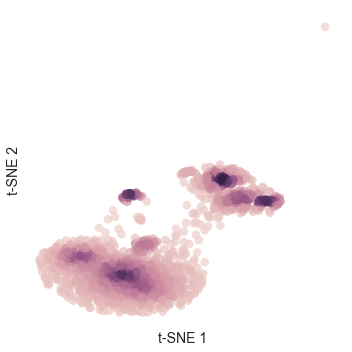

CPU times: user 23.9 s, sys: 1.21 s, total: 25.1 s
Wall time: 25.1 s


In [58]:
%%time 
P14Retina_tSNE_200 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=200, seed=18) 
P14Retina_tSNE_200.plot()

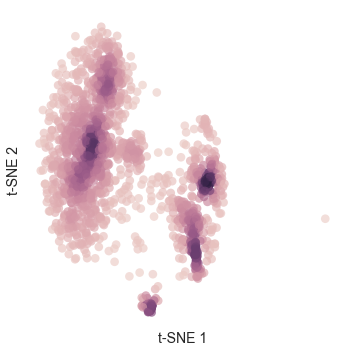

CPU times: user 33.5 s, sys: 2.79 s, total: 36.3 s
Wall time: 36.3 s


In [59]:
%%time 
P14Retina_tSNE_500 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=500, seed=18) 
P14Retina_tSNE_500.plot()

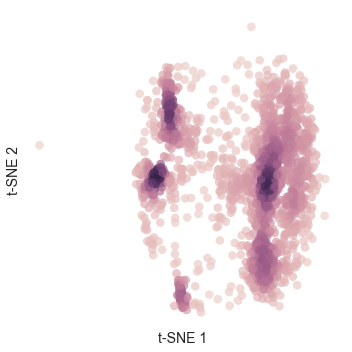

CPU times: user 25.5 s, sys: 1.59 s, total: 27.1 s
Wall time: 26.8 s


In [60]:
%%time 
P14Retina_tSNE_1000 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=1000, seed=18) 
P14Retina_tSNE_1000.plot()

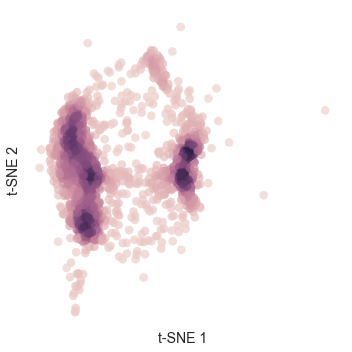

CPU times: user 23.2 s, sys: 1.5 s, total: 24.7 s
Wall time: 24.4 s


In [61]:
%%time 
P14Retina_tSNE_1500 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=1500, seed=18) 
P14Retina_tSNE_1500.plot()

---
#### 2. compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs
* for DCA, _do not arcsinh-transform_ because raw counts are input

In [62]:
k = 30 # choose value for K-nearest neighbor calculations

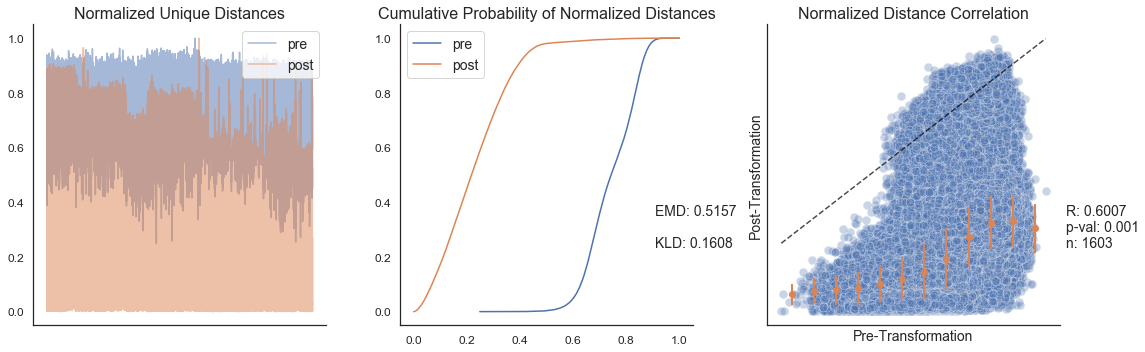

Knn Preservation: 96.8508

CPU times: user 1min 26s, sys: 10.6 s, total: 1min 36s
Wall time: 1min 36s


In [63]:
%%time
# look at t-SNE (perplexity==5) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_05.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_05.knn_graph(k))))

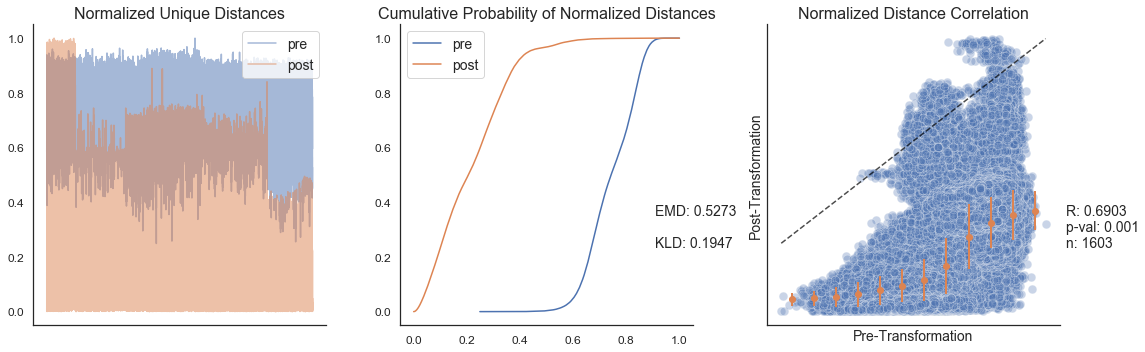

Knn Preservation: 96.8769

CPU times: user 1min 26s, sys: 10.8 s, total: 1min 37s
Wall time: 1min 36s


In [64]:
%%time
# look at t-SNE (perplexity==10) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_10.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_10.knn_graph(k))))

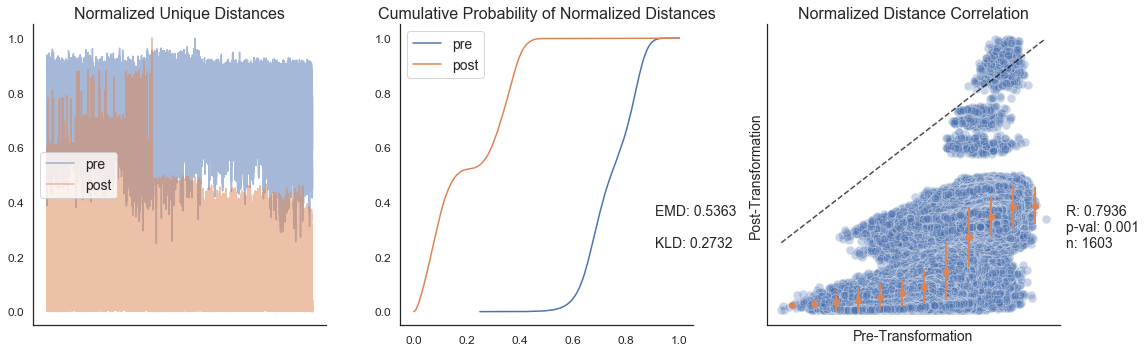

Knn Preservation: 97.0275

CPU times: user 1min 26s, sys: 11.1 s, total: 1min 37s
Wall time: 1min 37s


In [65]:
%%time
# look at t-SNE (perplexity==30) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_30.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_30.knn_graph(k))))

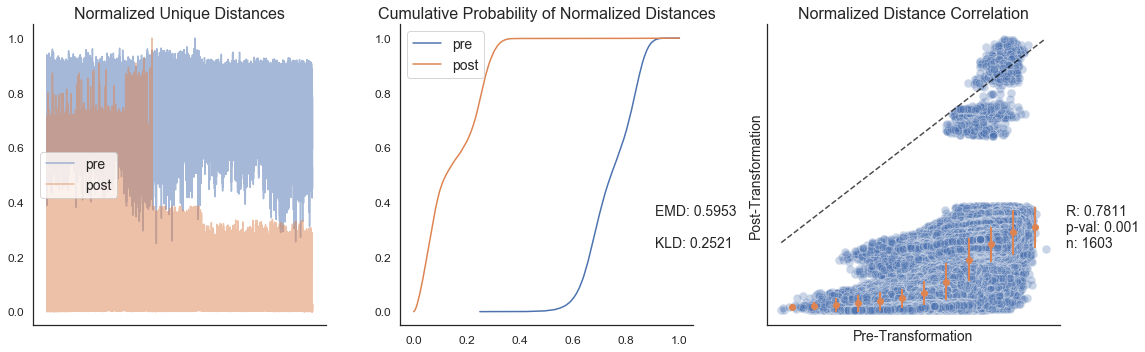

Knn Preservation: 97.2344

CPU times: user 1min 26s, sys: 12 s, total: 1min 38s
Wall time: 1min 38s


In [66]:
%%time
# look at t-SNE (perplexity==70) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_70.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_70.knn_graph(k))))

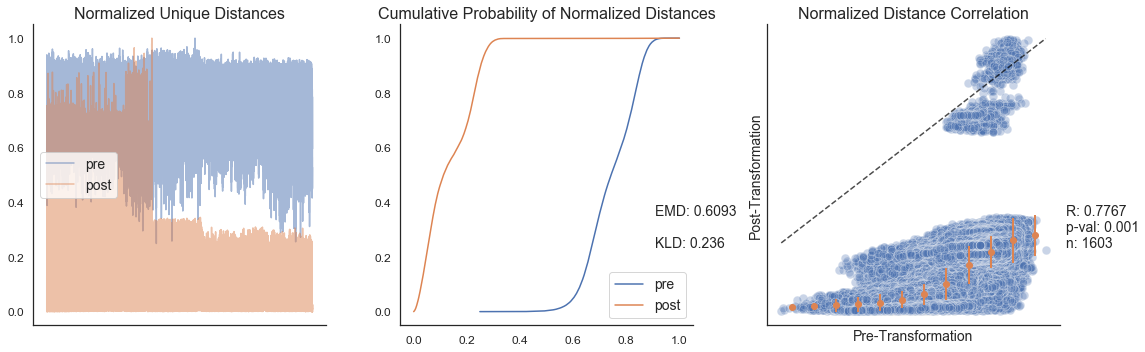

Knn Preservation: 97.3565

CPU times: user 1min 26s, sys: 11.8 s, total: 1min 38s
Wall time: 1min 37s


In [67]:
%%time
# look at t-SNE (perplexity==100) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_100.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_100.knn_graph(k))))

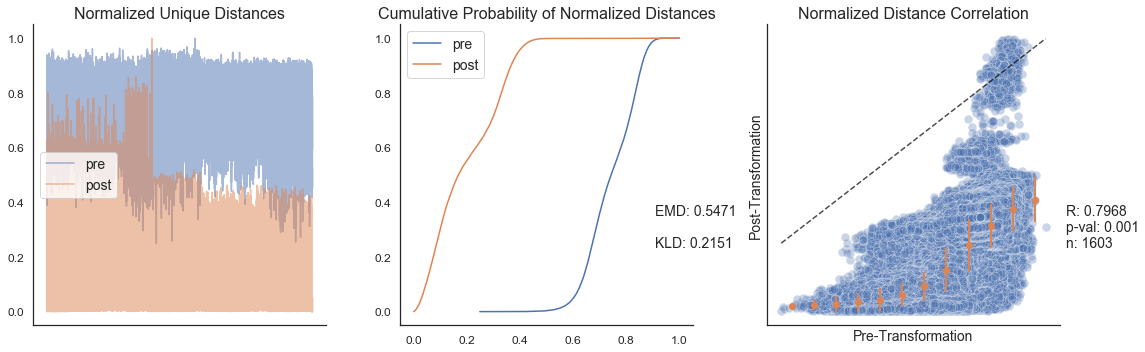

Knn Preservation: 97.556

CPU times: user 1min 26s, sys: 11.8 s, total: 1min 38s
Wall time: 1min 38s


In [68]:
%%time
# look at t-SNE (perplexity==200) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_200.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_200.knn_graph(k))))

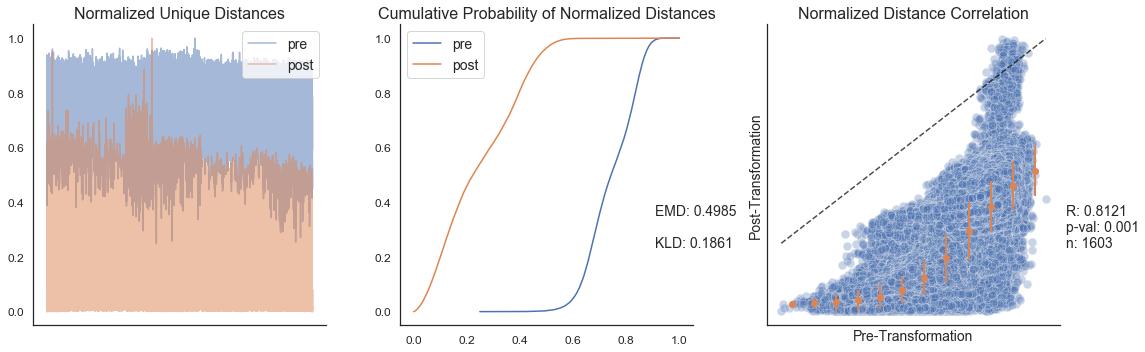

Knn Preservation: 97.7521

CPU times: user 1min 26s, sys: 11.6 s, total: 1min 38s
Wall time: 1min 37s


In [69]:
%%time
# look at t-SNE (perplexity==500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_500.knn_graph(k))))

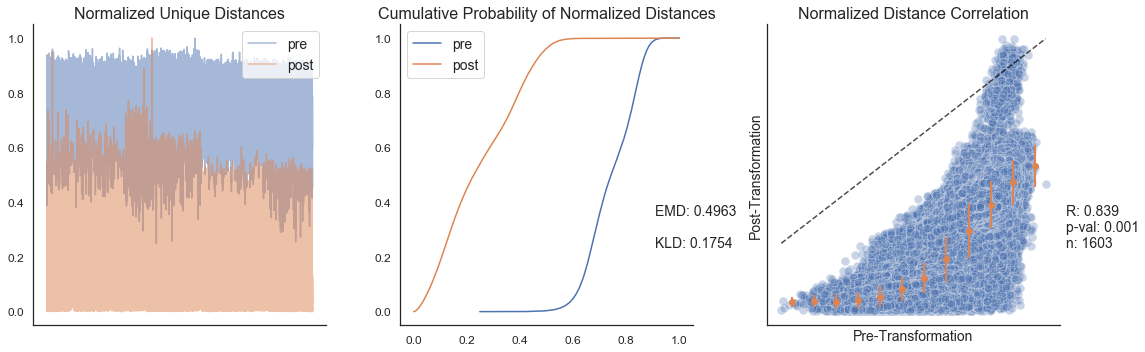

Knn Preservation: 97.8389

CPU times: user 1min 27s, sys: 11.9 s, total: 1min 39s
Wall time: 1min 38s


In [71]:
%%time
# look at t-SNE (perplexity==1000) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_1000.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_1000.knn_graph(k))))

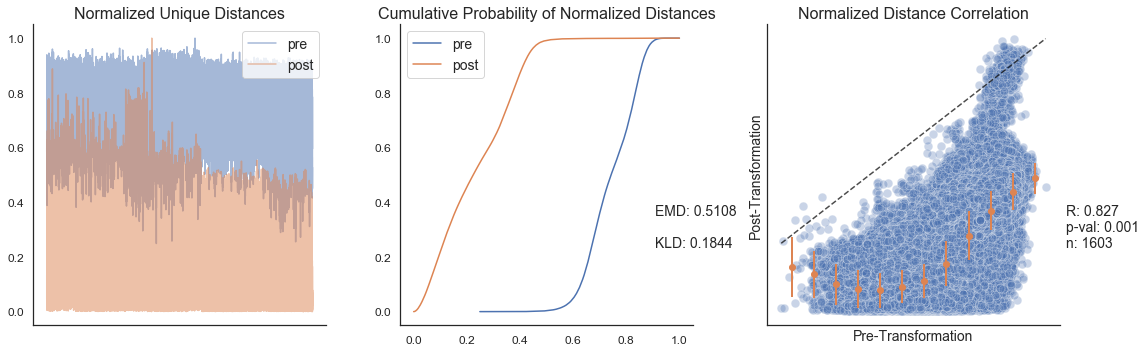

Knn Preservation: 97.8383

CPU times: user 1min 26s, sys: 10.7 s, total: 1min 37s
Wall time: 1min 36s


In [72]:
%%time
# look at t-SNE (perplexity==1500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_tSNE_1500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_tSNE_1500.knn_graph(k))))

---
Now do the same thing with UMAP

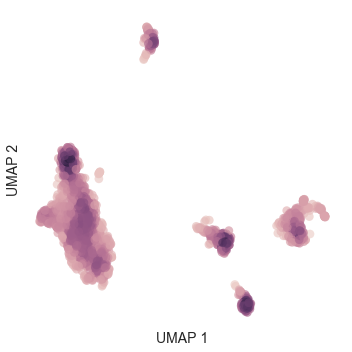

CPU times: user 2.31 s, sys: 231 ms, total: 2.54 s
Wall time: 2.18 s


In [73]:
%%time 
P14Retina_UMAP_05 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=5, seed=18) 
P14Retina_UMAP_05.plot()

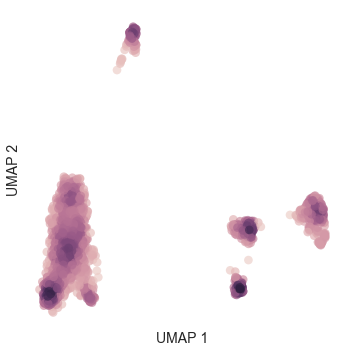

CPU times: user 3.01 s, sys: 200 ms, total: 3.21 s
Wall time: 2.81 s


In [74]:
%%time 
P14Retina_UMAP_10 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=10, seed=18) 
P14Retina_UMAP_10.plot()

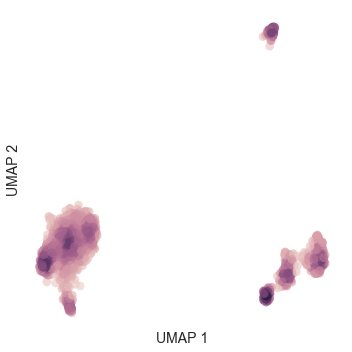

CPU times: user 4.08 s, sys: 205 ms, total: 4.28 s
Wall time: 3.89 s


In [75]:
%%time 
P14Retina_UMAP_30 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=30, seed=18) # use standard perplexity of 30 here
P14Retina_UMAP_30.plot()

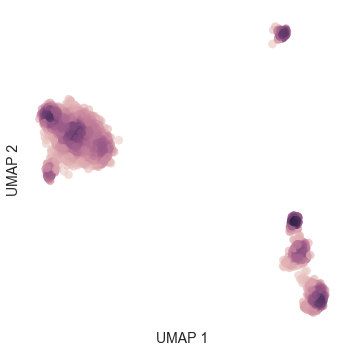

CPU times: user 4.95 s, sys: 209 ms, total: 5.16 s
Wall time: 4.77 s


In [76]:
%%time 
P14Retina_UMAP_70 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=70, seed=18) 
P14Retina_UMAP_70.plot()

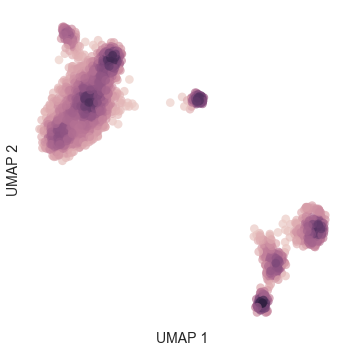

CPU times: user 5.37 s, sys: 219 ms, total: 5.59 s
Wall time: 5.19 s


In [77]:
%%time 
P14Retina_UMAP_100 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=100, seed=18) 
P14Retina_UMAP_100.plot()

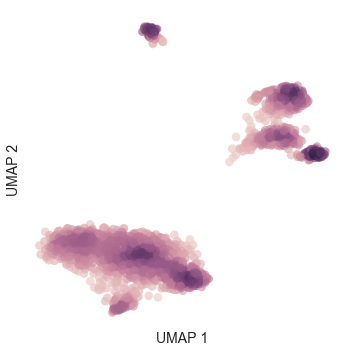

CPU times: user 6.22 s, sys: 229 ms, total: 6.45 s
Wall time: 6.05 s


In [78]:
%%time 
P14Retina_UMAP_200 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=200, seed=18) 
P14Retina_UMAP_200.plot()

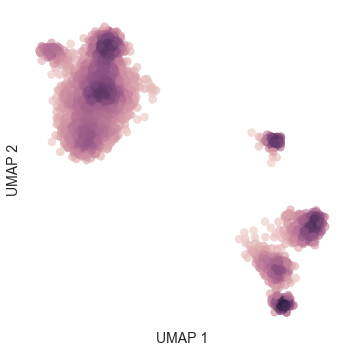

CPU times: user 7.57 s, sys: 329 ms, total: 7.9 s
Wall time: 7.49 s


In [79]:
%%time 
P14Retina_UMAP_500 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=500, seed=18) 
P14Retina_UMAP_500.plot()

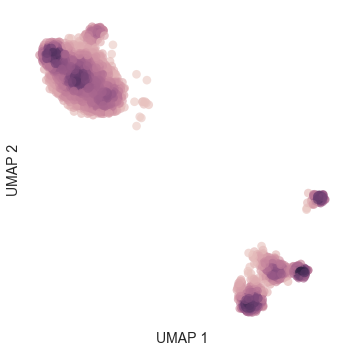

CPU times: user 8.75 s, sys: 382 ms, total: 9.13 s
Wall time: 8.74 s


In [80]:
%%time 
P14Retina_UMAP_1000 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=1000, seed=18) 
P14Retina_UMAP_1000.plot()

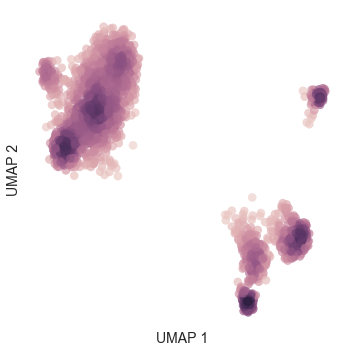

CPU times: user 9.37 s, sys: 426 ms, total: 9.79 s
Wall time: 9.37 s


In [81]:
%%time 
P14Retina_UMAP_1500 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=1500, seed=18) 
P14Retina_UMAP_1500.plot()

---
#### 2. compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

In [82]:
k = 30 # choose value for K-nearest neighbor calculations

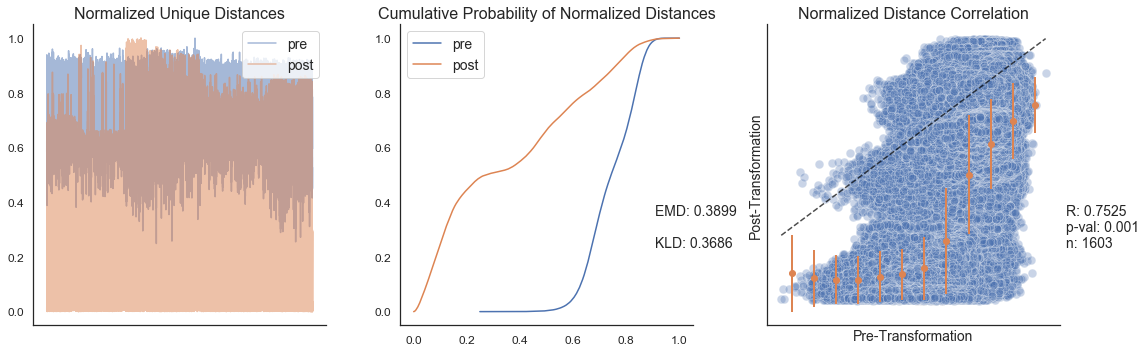

Knn Preservation: 96.8514

CPU times: user 1min 26s, sys: 10.1 s, total: 1min 36s
Wall time: 1min 36s


In [83]:
%%time
# look at UMAP (perplexity==5) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_05.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_05.knn_graph(k))))

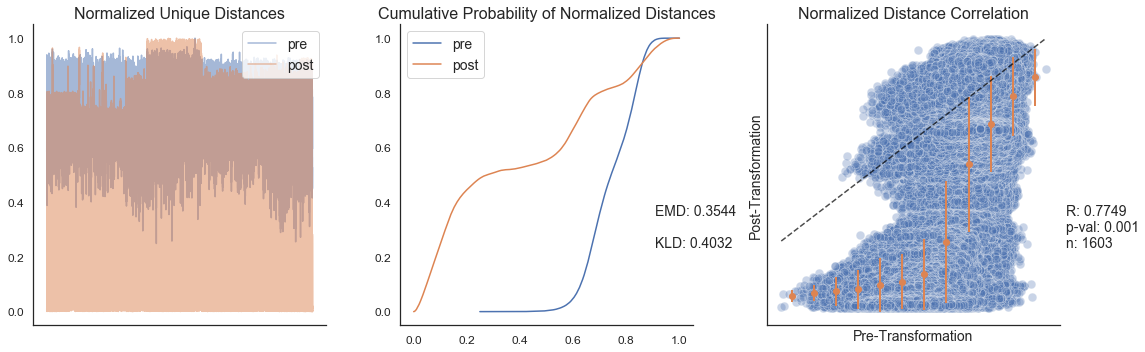

Knn Preservation: 96.8801

CPU times: user 1min 27s, sys: 10.8 s, total: 1min 38s
Wall time: 1min 37s


In [84]:
%%time
# look at UMAP (perplexity==10) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_10.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_10.knn_graph(k))))

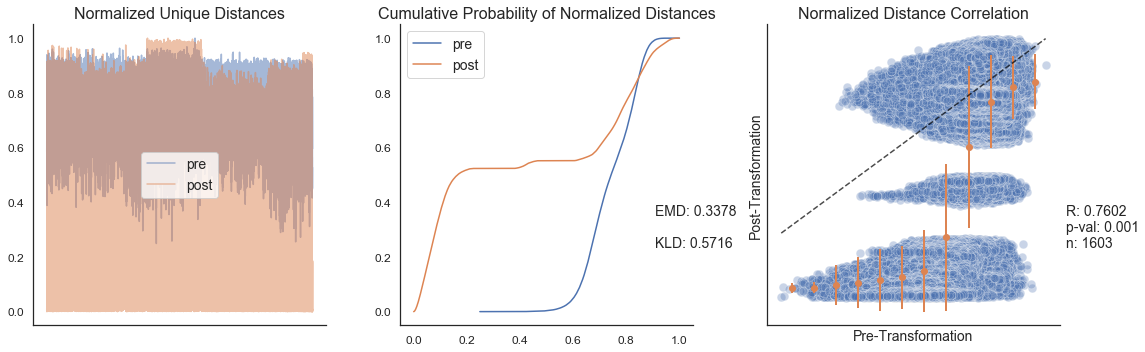

Knn Preservation: 96.8563

CPU times: user 1min 27s, sys: 10.8 s, total: 1min 38s
Wall time: 1min 38s


In [85]:
%%time
# look at UMAP (perplexity==30) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_30.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_30.knn_graph(k))))

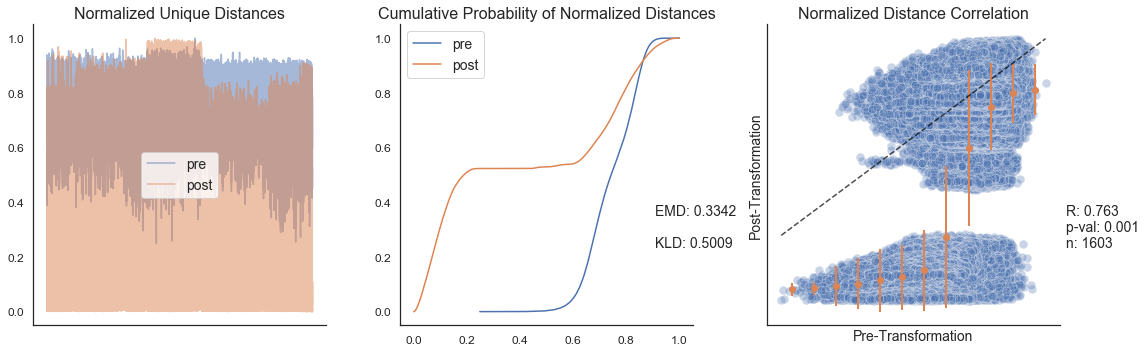

Knn Preservation: 96.8846

CPU times: user 1min 27s, sys: 11.6 s, total: 1min 38s
Wall time: 1min 39s


In [86]:
%%time
# look at UMAP (perplexity==70) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_70.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_70.knn_graph(k))))

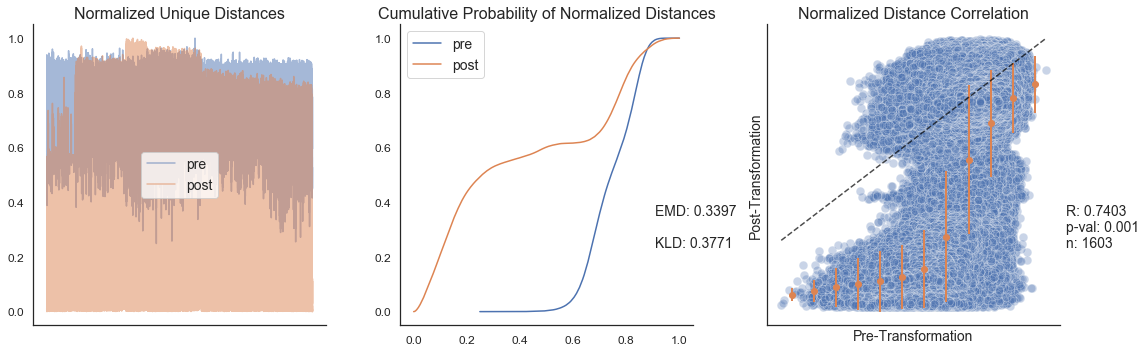

Knn Preservation: 96.874

CPU times: user 1min 28s, sys: 10.7 s, total: 1min 38s
Wall time: 1min 39s


In [87]:
%%time
# look at UMAP (perplexity==100) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_100.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_100.knn_graph(k))))

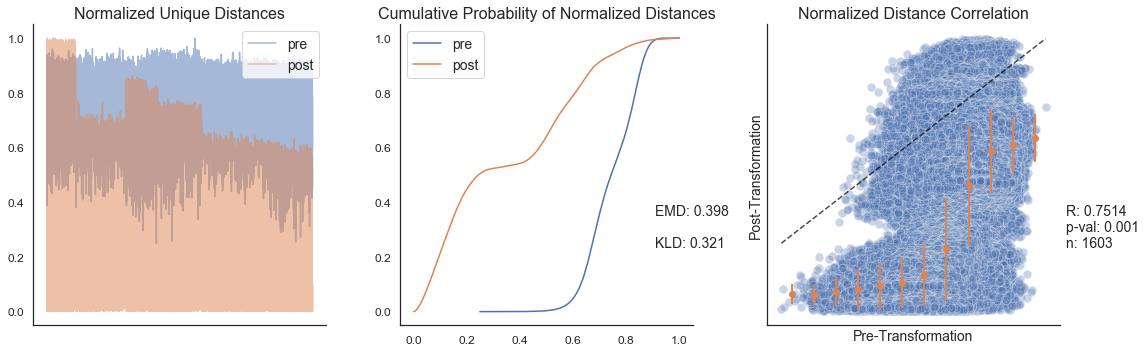

Knn Preservation: 96.8945

CPU times: user 1min 27s, sys: 11.1 s, total: 1min 38s
Wall time: 1min 39s


In [88]:
%%time
# look at UMAP (perplexity==200) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_200.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_200.knn_graph(k))))

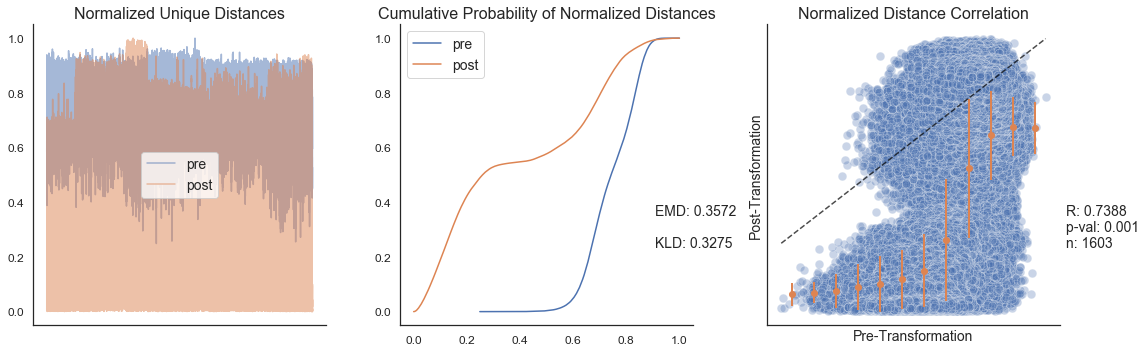

Knn Preservation: 96.8874

CPU times: user 1min 27s, sys: 9.9 s, total: 1min 37s
Wall time: 1min 38s


In [89]:
%%time
# look at UMAP (perplexity==500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_500.knn_graph(k))))

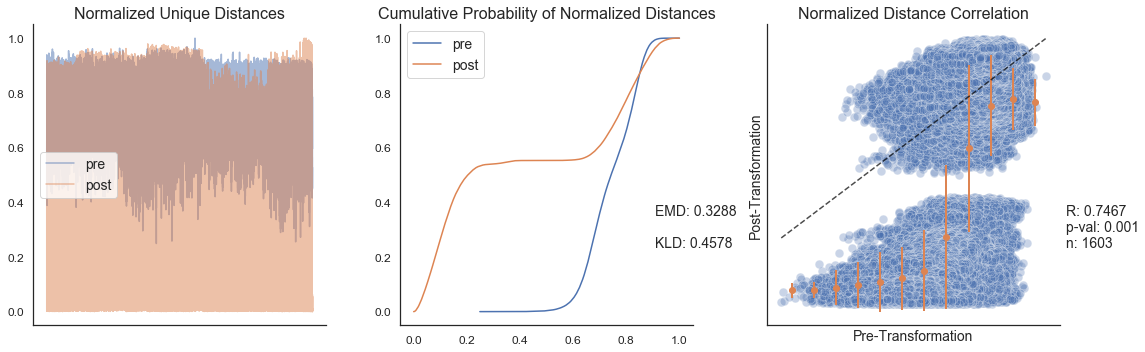

Knn Preservation: 96.8958

CPU times: user 1min 27s, sys: 11.8 s, total: 1min 38s
Wall time: 1min 40s


In [90]:
%%time
# look at UMAP (perplexity==1000) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_1000.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_1000.knn_graph(k))))

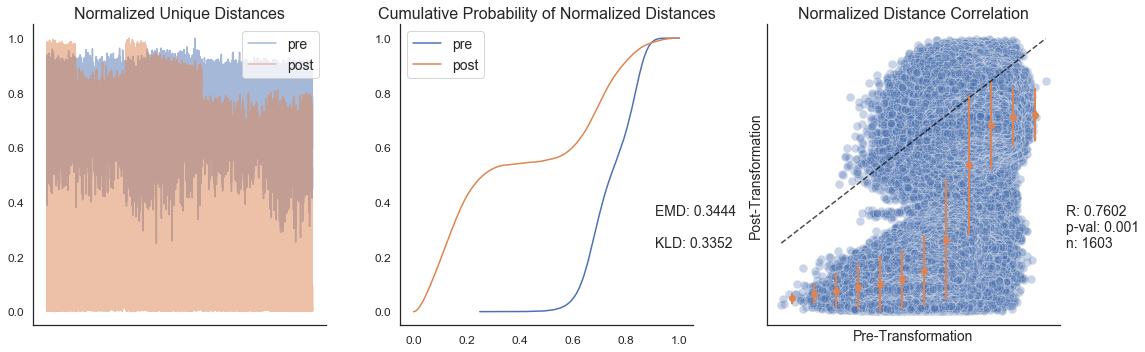

Knn Preservation: 96.8943

CPU times: user 1min 38s, sys: 12.3 s, total: 1min 50s
Wall time: 1min 55s


In [91]:
%%time
# look at UMAP (perplexity==1500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=P14Retina_UMAP_1500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=P14Retina_UMAP_1500.knn_graph(k))))

---
#### 3.0. read in continuous dataset

In [92]:
%time qi = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.preprocessed.tsv', cells_axis=0, labels=[0,0])

CPU times: user 166 ms, sys: 57.5 ms, total: 224 ms
Wall time: 286 ms


In [93]:
# cells x genes
qi.data.shape

(1738, 500)

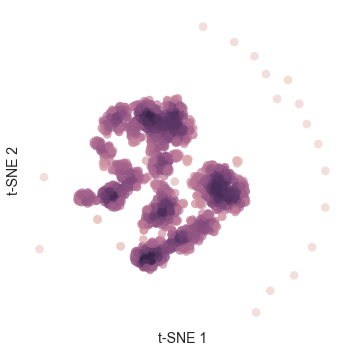

CPU times: user 16.1 s, sys: 160 ms, total: 16.3 s
Wall time: 18.6 s


In [94]:
%%time 
qi_tSNE_05 = fcc_tSNE(qi.arcsinh_norm(), perplexity=5, seed=18) 
qi_tSNE_05.plot()

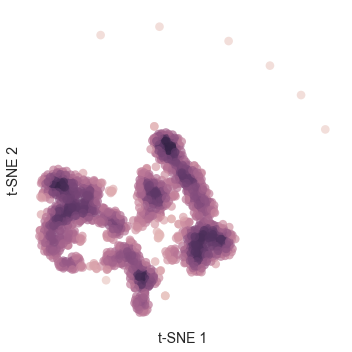

CPU times: user 14.8 s, sys: 259 ms, total: 15.1 s
Wall time: 16.2 s


In [95]:
%%time 
qi_tSNE_10 = fcc_tSNE(qi.arcsinh_norm(), perplexity=10, seed=18) 
qi_tSNE_10.plot()

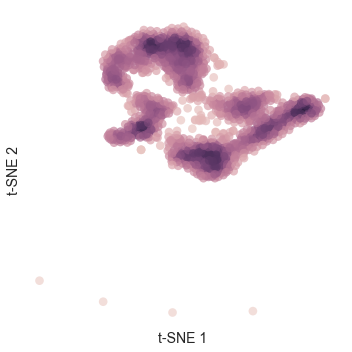

CPU times: user 17.7 s, sys: 422 ms, total: 18.1 s
Wall time: 19.2 s


In [96]:
%%time 
qi_tSNE_30 = fcc_tSNE(qi.arcsinh_norm(), perplexity=30, seed=18) # use standard perplexity of 30 here
qi_tSNE_30.plot()

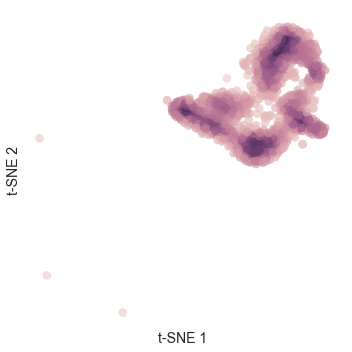

CPU times: user 16.2 s, sys: 606 ms, total: 16.8 s
Wall time: 16.8 s


In [97]:
%%time 
qi_tSNE_70 = fcc_tSNE(qi.arcsinh_norm(), perplexity=70, seed=18) 
qi_tSNE_70.plot()

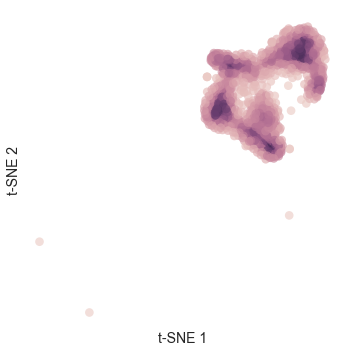

CPU times: user 17.7 s, sys: 753 ms, total: 18.5 s
Wall time: 18.5 s


In [98]:
%%time 
qi_tSNE_100 = fcc_tSNE(qi.arcsinh_norm(), perplexity=100, seed=18) 
qi_tSNE_100.plot()

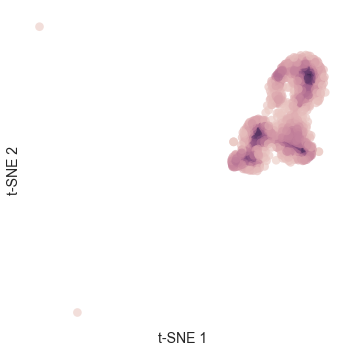

CPU times: user 22.8 s, sys: 1.22 s, total: 24 s
Wall time: 24 s


In [99]:
%%time 
qi_tSNE_200 = fcc_tSNE(qi.arcsinh_norm(), perplexity=200, seed=18) 
qi_tSNE_200.plot()

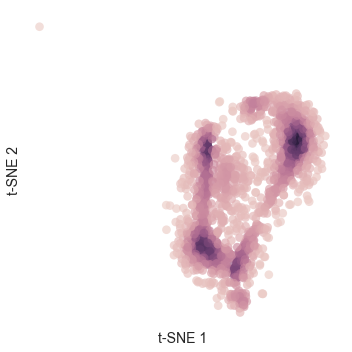

CPU times: user 37 s, sys: 2.63 s, total: 39.6 s
Wall time: 39.8 s


In [100]:
%%time 
qi_tSNE_500 = fcc_tSNE(qi.arcsinh_norm(), perplexity=500, seed=18) 
qi_tSNE_500.plot()

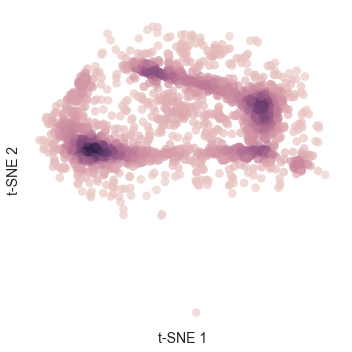

CPU times: user 37.4 s, sys: 2.64 s, total: 40 s
Wall time: 40.1 s


In [101]:
%%time 
qi_tSNE_1000 = fcc_tSNE(qi.arcsinh_norm(), perplexity=1000, seed=18) 
qi_tSNE_1000.plot()

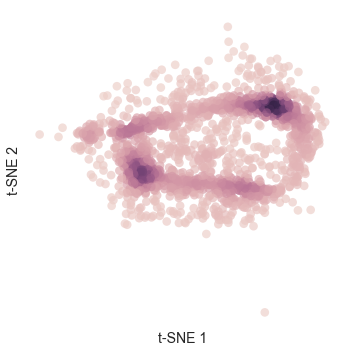

CPU times: user 26.8 s, sys: 1.82 s, total: 28.6 s
Wall time: 28.5 s


In [102]:
%%time 
qi_tSNE_1500 = fcc_tSNE(qi.arcsinh_norm(), perplexity=1500, seed=18) 
qi_tSNE_1500.plot()

---
#### 2. compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs
* for DCA, _do not arcsinh-transform_ because raw counts are input

In [103]:
k = 30 # choose value for K-nearest neighbor calculations

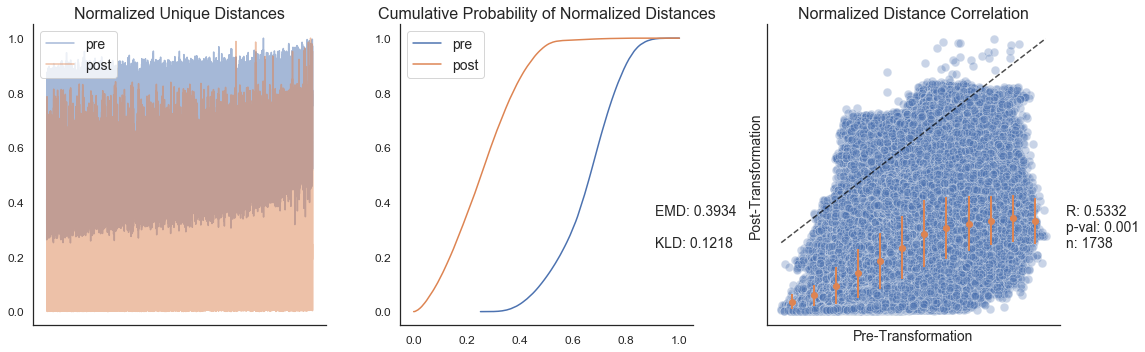

Knn Preservation: 97.6058

CPU times: user 1min 55s, sys: 13.8 s, total: 2min 9s
Wall time: 2min 13s


In [104]:
%%time
# look at t-SNE (perplexity==5) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_05.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_05.knn_graph(k))))

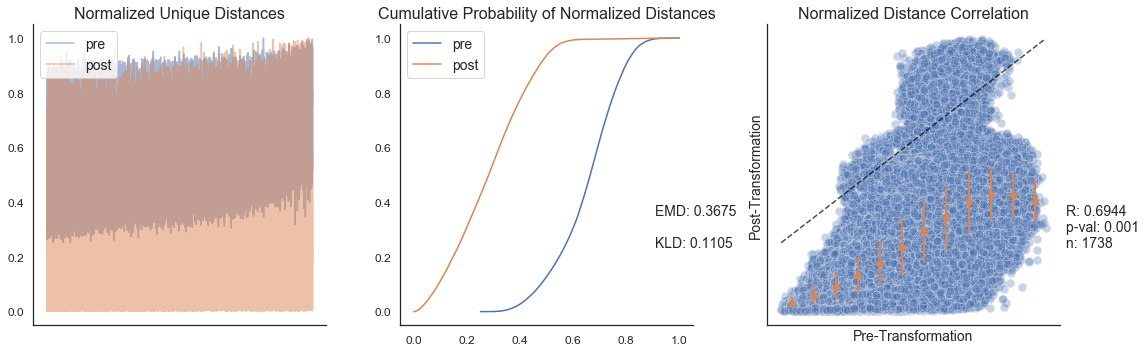

Knn Preservation: 97.6748

CPU times: user 1min 46s, sys: 13.4 s, total: 1min 59s
Wall time: 2min 2s


In [105]:
%%time
# look at t-SNE (perplexity==10) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_10.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_10.knn_graph(k))))

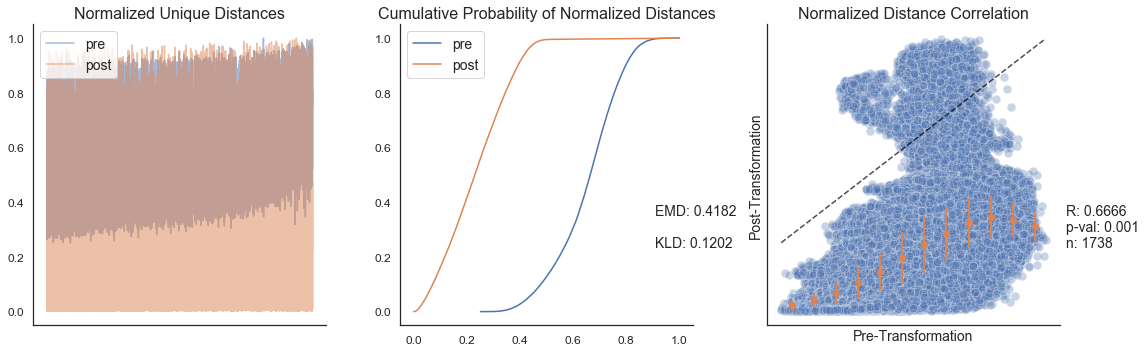

Knn Preservation: 97.8199

CPU times: user 1min 42s, sys: 11.9 s, total: 1min 54s
Wall time: 1min 54s


In [106]:
%%time
# look at t-SNE (perplexity==30) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_30.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_30.knn_graph(k))))

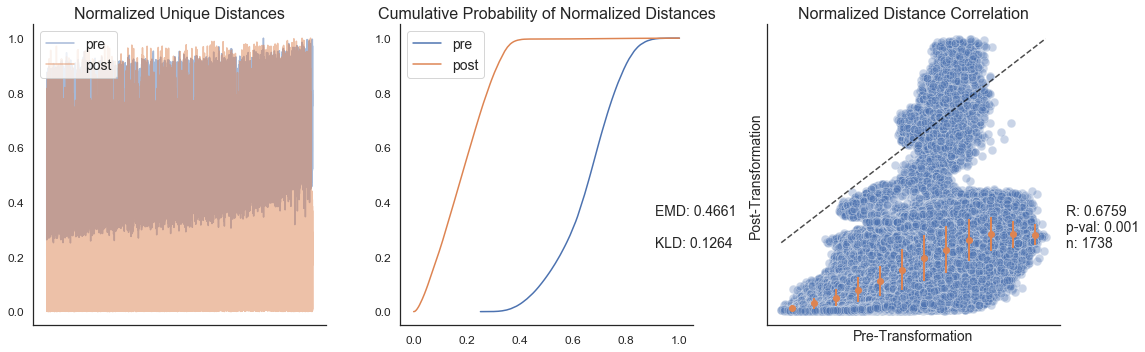

Knn Preservation: 97.9436

CPU times: user 1min 44s, sys: 12.6 s, total: 1min 56s
Wall time: 1min 56s


In [107]:
%%time
# look at t-SNE (perplexity==70) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_70.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_70.knn_graph(k))))

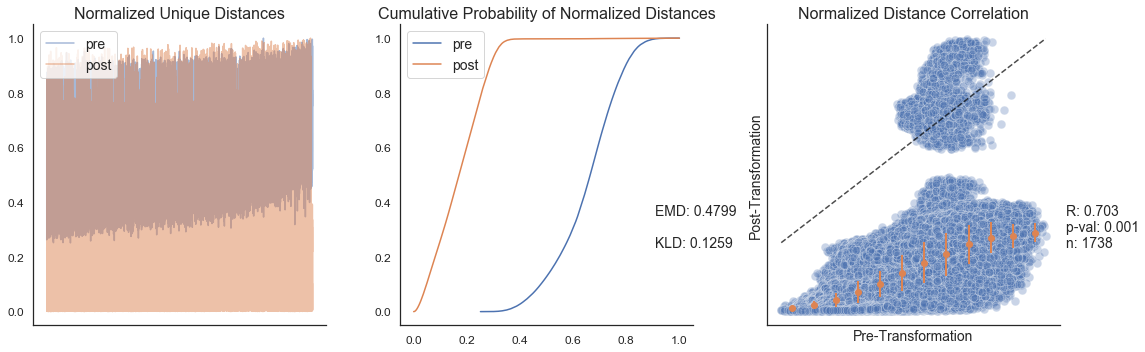

Knn Preservation: 98.0124

CPU times: user 1min 55s, sys: 11.9 s, total: 2min 7s
Wall time: 2min 12s


In [108]:
%%time
# look at t-SNE (perplexity==100) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_100.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_100.knn_graph(k))))

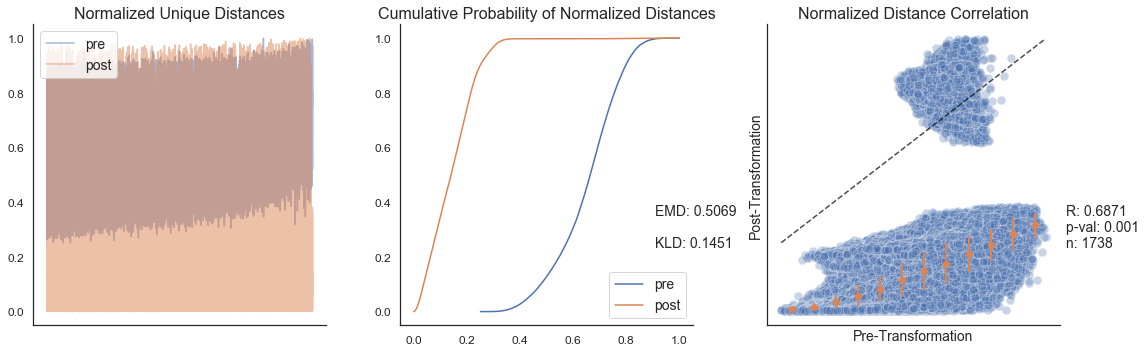

Knn Preservation: 98.1307

CPU times: user 1min 50s, sys: 12.7 s, total: 2min 2s
Wall time: 2min 7s


In [109]:
%%time
# look at t-SNE (perplexity==200) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_200.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_200.knn_graph(k))))

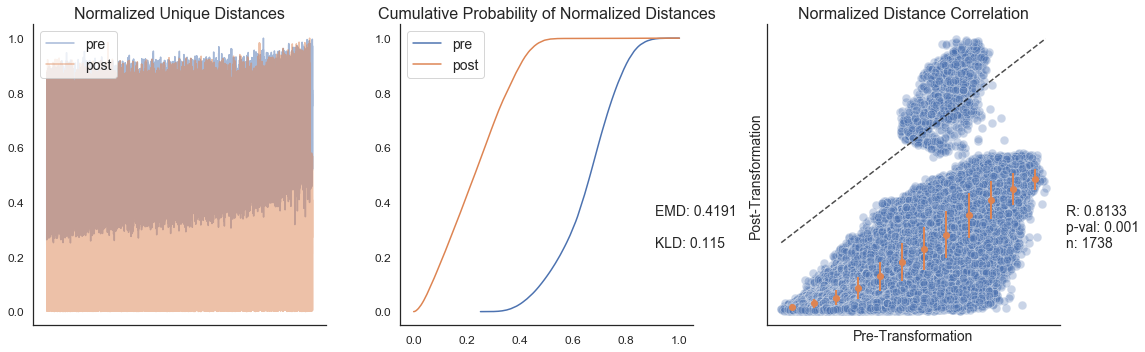

Knn Preservation: 98.3731

CPU times: user 1min 48s, sys: 12.3 s, total: 2min
Wall time: 2min 4s


In [113]:
%%time
# look at t-SNE (perplexity==500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_500.knn_graph(k))))

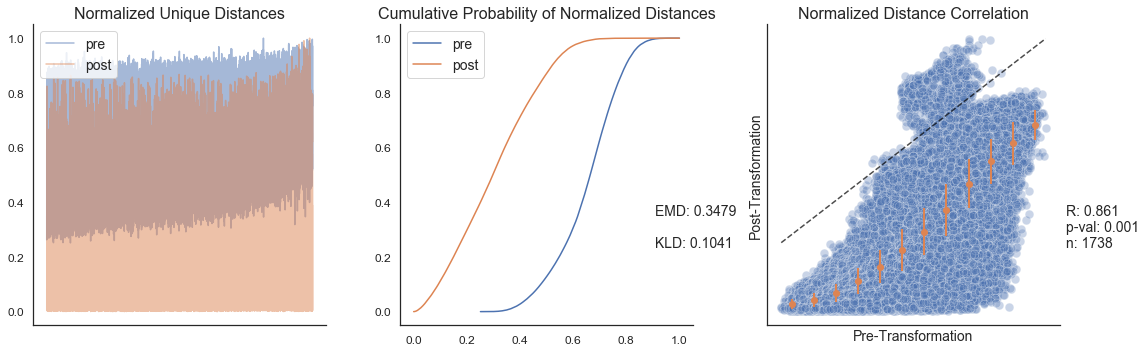

Knn Preservation: 98.5167

CPU times: user 1min 53s, sys: 14.9 s, total: 2min 8s
Wall time: 2min 19s


In [111]:
%%time
# look at t-SNE (perplexity==1000) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_1000.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_1000.knn_graph(k))))

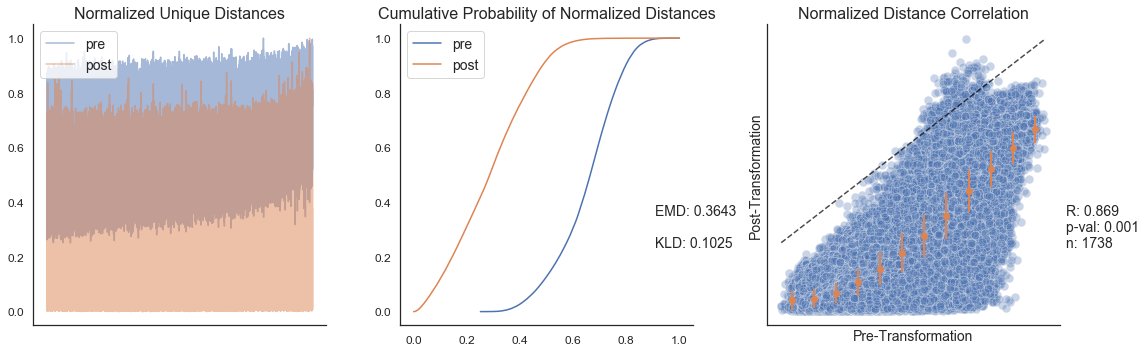

Knn Preservation: 98.4672

CPU times: user 1min 47s, sys: 13.2 s, total: 2min 1s
Wall time: 2min 4s


In [112]:
%%time
# look at t-SNE (perplexity==1500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_tSNE_1500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_tSNE_1500.knn_graph(k))))

---
Now do the same thing with UMAP

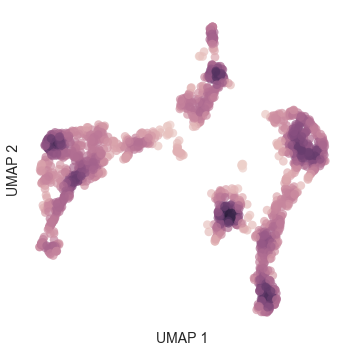

CPU times: user 2.76 s, sys: 343 ms, total: 3.1 s
Wall time: 3.23 s


In [114]:
%%time 
qi_UMAP_05 = fcc_UMAP(qi.arcsinh_norm(), perplexity=5, seed=18) 
qi_UMAP_05.plot()

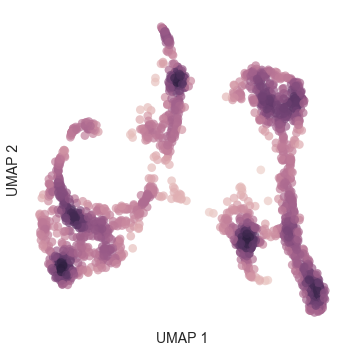

CPU times: user 3.56 s, sys: 281 ms, total: 3.84 s
Wall time: 3.53 s


In [115]:
%%time 
qi_UMAP_10 = fcc_UMAP(qi.arcsinh_norm(), perplexity=10, seed=18) 
qi_UMAP_10.plot()

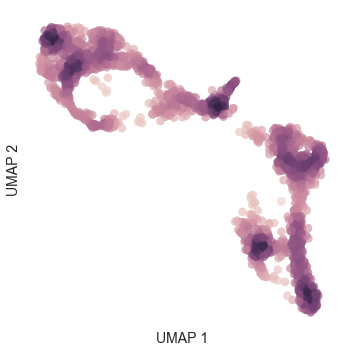

CPU times: user 4.84 s, sys: 257 ms, total: 5.09 s
Wall time: 4.87 s


In [116]:
%%time 
qi_UMAP_30 = fcc_UMAP(qi.arcsinh_norm(), perplexity=30, seed=18)
qi_UMAP_30.plot()

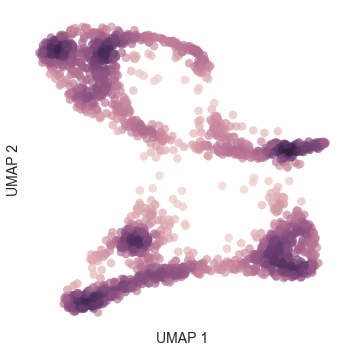

CPU times: user 6.13 s, sys: 266 ms, total: 6.4 s
Wall time: 6.63 s


In [117]:
%%time 
qi_UMAP_70 = fcc_UMAP(qi.arcsinh_norm(), perplexity=70, seed=18) 
qi_UMAP_70.plot()

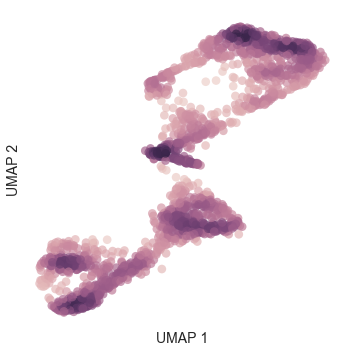

CPU times: user 6.55 s, sys: 321 ms, total: 6.87 s
Wall time: 6.72 s


In [118]:
%%time 
qi_UMAP_100 = fcc_UMAP(qi.arcsinh_norm(), perplexity=100, seed=18) 
qi_UMAP_100.plot()

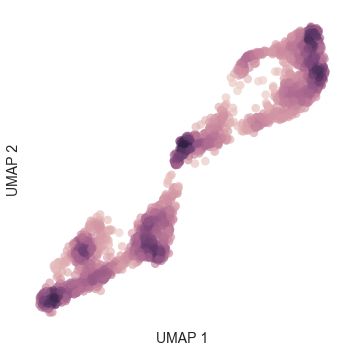

CPU times: user 7.68 s, sys: 314 ms, total: 7.99 s
Wall time: 7.9 s


In [119]:
%%time 
qi_UMAP_200 = fcc_UMAP(qi.arcsinh_norm(), perplexity=200, seed=18) 
qi_UMAP_200.plot()

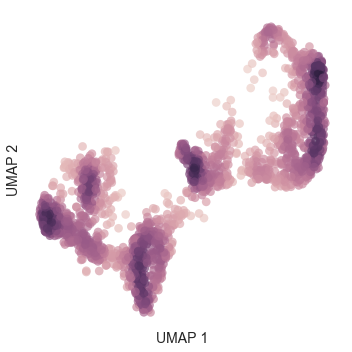

CPU times: user 8.75 s, sys: 388 ms, total: 9.13 s
Wall time: 8.88 s


In [120]:
%%time 
qi_UMAP_500 = fcc_UMAP(qi.arcsinh_norm(), perplexity=500, seed=18) 
qi_UMAP_500.plot()

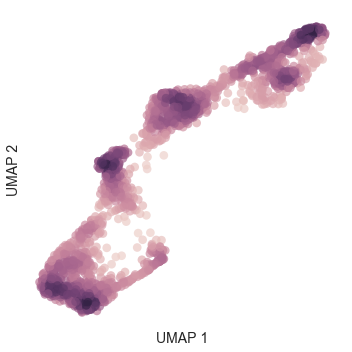

CPU times: user 11 s, sys: 519 ms, total: 11.5 s
Wall time: 12.1 s


In [121]:
%%time 
qi_UMAP_1000 = fcc_UMAP(qi.arcsinh_norm(), perplexity=1000, seed=18) 
qi_UMAP_1000.plot()

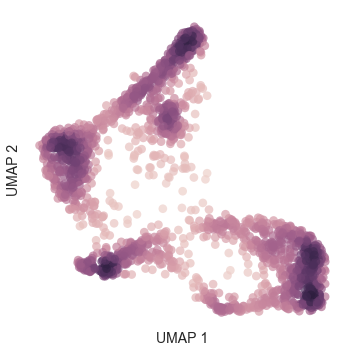

CPU times: user 11.3 s, sys: 635 ms, total: 11.9 s
Wall time: 12.3 s


In [122]:
%%time 
qi_UMAP_1500 = fcc_UMAP(qi.arcsinh_norm(), perplexity=1500, seed=18) 
qi_UMAP_1500.plot()

---
#### 2. compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

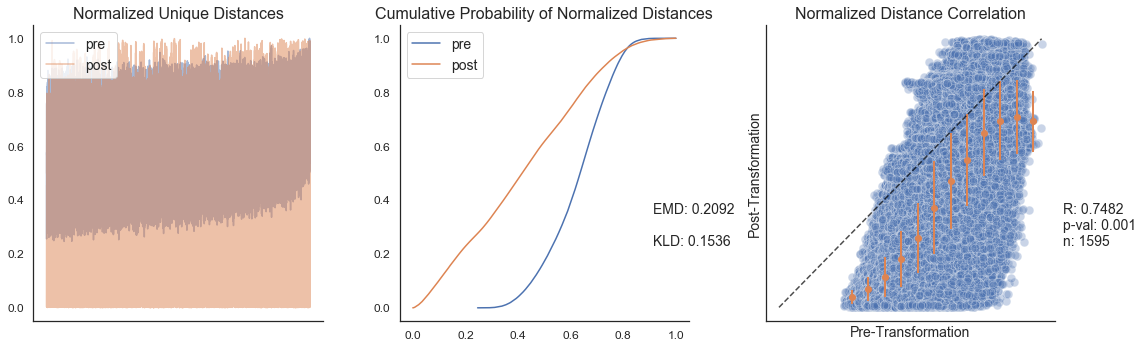

Knn Preservation: 97.4233

CPU times: user 1min 25s, sys: 11.7 s, total: 1min 37s
Wall time: 1min 38s


In [132]:
%%time
# look at UMAP (perplexity==5) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_05.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_05.knn_graph(k))))

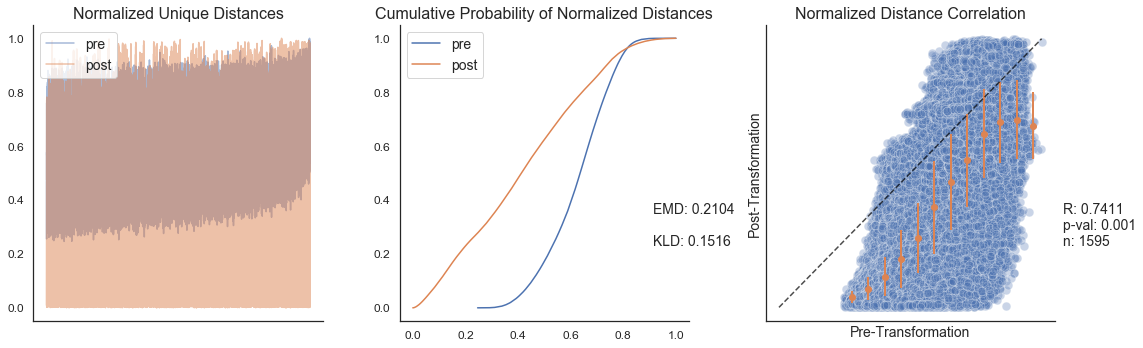

Knn Preservation: 97.4994

CPU times: user 1min 22s, sys: 11 s, total: 1min 33s
Wall time: 1min 33s


In [133]:
%%time
# look at UMAP (perplexity==10) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_10.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_10.knn_graph(k))))

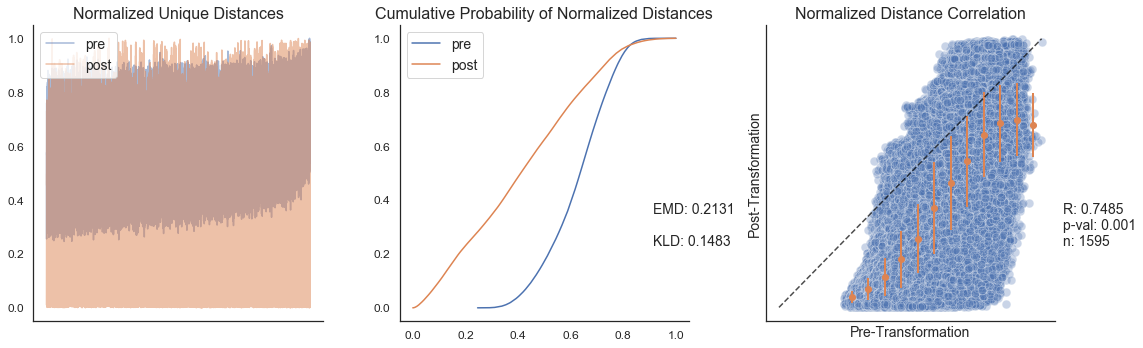

Knn Preservation: 97.5229

CPU times: user 1min 22s, sys: 9.86 s, total: 1min 32s
Wall time: 1min 32s


In [134]:
%%time
# look at UMAP (perplexity==30) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_30.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_30.knn_graph(k))))

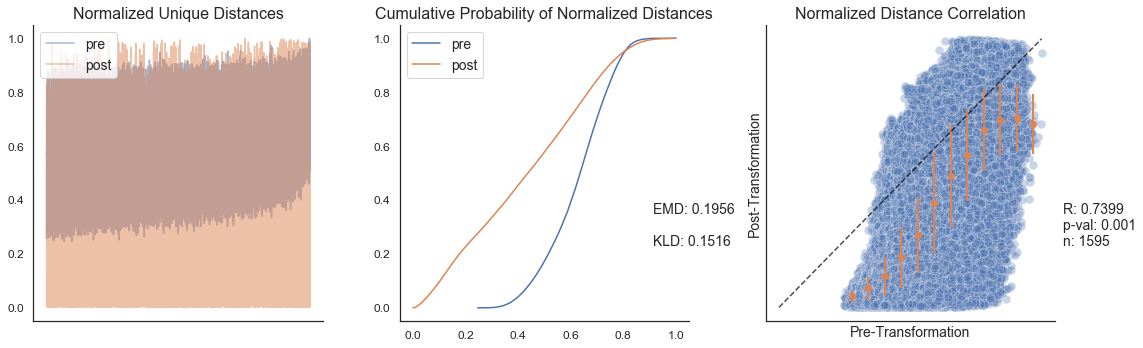

Knn Preservation: 97.5305

CPU times: user 1min 22s, sys: 10 s, total: 1min 32s
Wall time: 1min 32s


In [135]:
%%time
# look at UMAP (perplexity==70) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_70.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_70.knn_graph(k))))

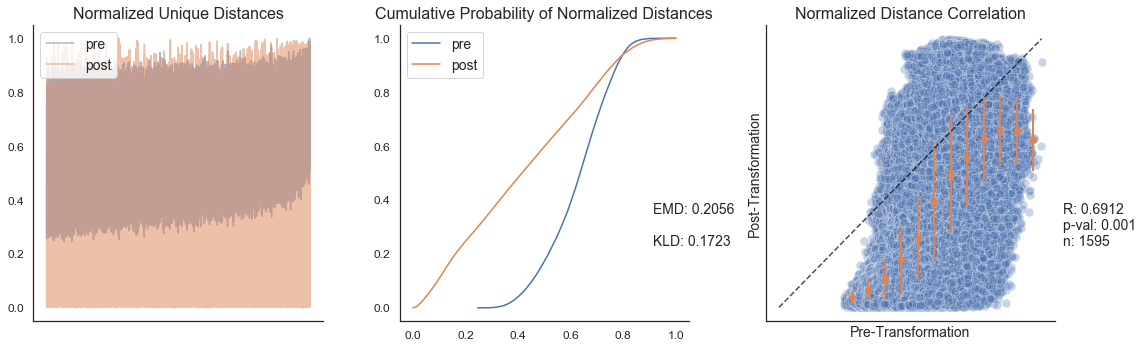

Knn Preservation: 97.5119

CPU times: user 1min 22s, sys: 10.2 s, total: 1min 32s
Wall time: 1min 31s


In [136]:
%%time
# look at UMAP (perplexity==100) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_100.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_100.knn_graph(k))))

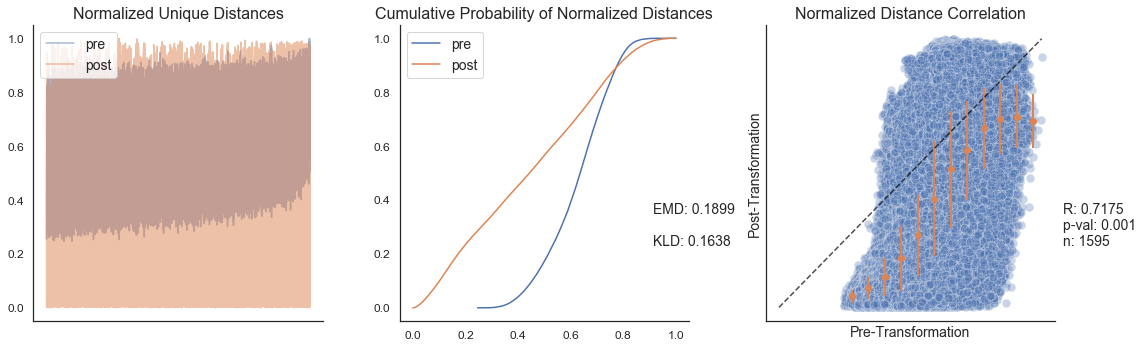

Knn Preservation: 97.5143

CPU times: user 1min 23s, sys: 10.5 s, total: 1min 33s
Wall time: 1min 32s


In [137]:
%%time
# look at UMAP (perplexity==200) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_200.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_200.knn_graph(k))))

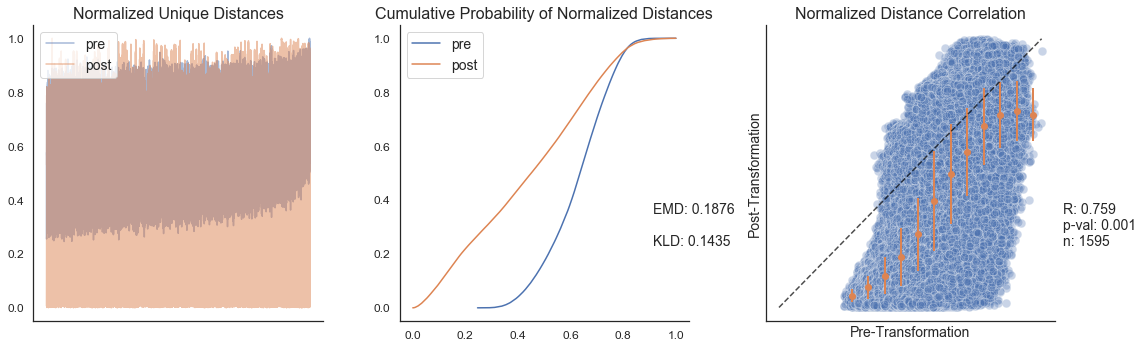

Knn Preservation: 97.5116

CPU times: user 1min 23s, sys: 11.6 s, total: 1min 35s
Wall time: 1min 36s


In [138]:
%%time
# look at UMAP (perplexity==500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_500.knn_graph(k))))

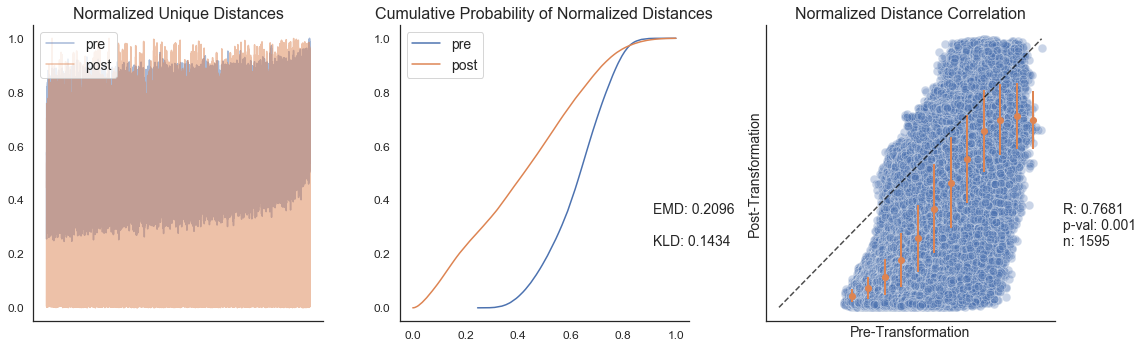

Knn Preservation: 97.5191

CPU times: user 1min 23s, sys: 10.9 s, total: 1min 34s
Wall time: 1min 33s


In [140]:
%%time
# look at UMAP (perplexity==1000) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_1000.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_1000.knn_graph(k))))

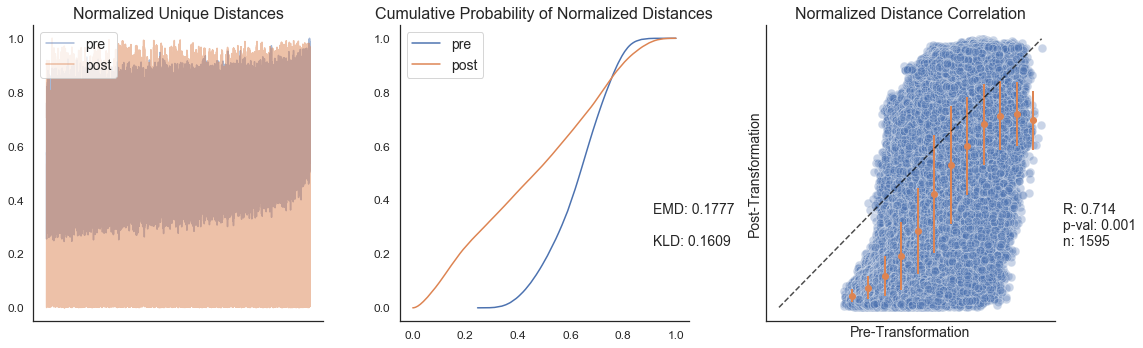

Knn Preservation: 97.5168

CPU times: user 1min 23s, sys: 10.5 s, total: 1min 33s
Wall time: 1min 32s


In [141]:
%%time
# look at UMAP (perplexity==1500) vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh', scale=1000), 
                                  post=qi_UMAP_1500.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh', scale=1000), 
                                                       post=qi_UMAP_1500.knn_graph(k))))